![Título de la imagen](https://images8.alphacoders.com/800/800013.jpg)


# Precios Sobre Ruedas  🚘

Un concesionario de autos usados en Australia está buscando una estrategia de precios más precisa para aumentar sus ventas y mejorar la rentabilidad. Actualmente, los precios se fijan de manera subjetiva, basándose en la experiencia de los vendedores y en tendencias generales del mercado. Sin embargo, esto ha generado inconsistencias en la tasación de los vehículos y oportunidades de negocio.

Para mejorar la precisión de los precios y aumentar la competitividad, la empresa quiere desarrollar un modelo de Machine Learning que prediga el precio óptimo de un auto en función de sus características.

## Análisis Exploratio de Datos 

### Liberias

In [1]:
# Sistema
import warnings
warnings.filterwarnings("ignore")

# Datos
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, MinMaxScaler

# Clustering y Reducción de Dimensionalidad
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Division de datos y optimización de Modelos
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Guardar Modelo
import joblib


# Configurar Pandas para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)

### Carga de datos 

In [2]:
df = pd.read_csv('../data/raw/Australian Vehicle Prices.csv')
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


### Exploración inicial de datos

In [3]:
Exploration = pd.DataFrame({'Valores nulos': df.isnull().sum(), 'Porcentaje (%)': (df.isnull().sum() / df.shape[0]) * 100, 'Tipo de dato': df.dtypes}).reset_index().rename(columns={'index': 'Columna'}).query('`Valores nulos` > 0').assign(Total_columnas=df.shape[1])
Exploration

,Columna,Valores nulos,Porcentaje (%),Tipo de dato,Total_columnas
0,Brand,1,0.005976,object,19
1,Year,1,0.005976,float64,19
2,Model,1,0.005976,object,19
3,Car/Suv,28,0.167324,object,19
4,Title,1,0.005976,object,19
5,UsedOrNew,1,0.005976,object,19
6,Transmission,1,0.005976,object,19
7,Engine,1,0.005976,object,19
8,DriveType,1,0.005976,object,19
9,FuelType,1,0.005976,object,19


### Información General
- El DataFrame tiene 19 columnas con distintos tipos de datos (principalmente `object` y algunos `float64`).

### Valores Nulos
- Algunas columnas tienen un porcentaje muy bajo de valores nulos (aproximadamente 0.006%).
- Las columnas con **más valores nulos** son:
  - `Location` (2.69%)
  - `BodyType` (1.69%)
  - `Doors` (9.59%)
  - `Seats` (10.19%)

### Columnas Destacadas
- `Price` y varias otras columnas tienen pocos valores nulos (entre 0 y 3 nulos).
- Las columnas de características físicas (`Doors`, `Seats`) presentan mayor proporción de datos faltantes, posiblemente relevantes para revisiones o imputaciones.


## Limpieza y Transformación de datos 💻

In [4]:
class DataLimpieza:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
    
    def clean_data(self):
        self.clean_engine()
        self.clean_fuel_consumption()
        self.clean_location()
        self.clean_colour_ext_int()
        self.clean_doors_and_seats()
        self.clean_year()
        self.drop_unnecessary_columns()
        self.convert_data_types()
        self.filter_and_impute()
        self.remove_invalid_categories()
        self.handle_missing_values()
        self.reorder_columns()
        return self.df

    def clean_engine(self):
        self.df['Engine'] = self.df['Engine'].replace('-', pd.NA)
        self.df[['Cylinders', 'EngineLiters']] = self.df['Engine'].str.extract(r'(\d+)\s*cyl,\s*([\d\.]+)\s*L')
        self.df['Cylinders'] = self.df['Cylinders'].astype(float)
        self.df['EngineLiters'] = self.df['EngineLiters'].astype(float)
        self.df.drop(columns=['Engine', 'CylindersinEngine'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_fuel_consumption(self):
        self.df['Fuel100KM'] = self.df['FuelConsumption'].str.extract(r'(\d+\.\d+)').astype(float)
        self.df.drop(columns=['FuelConsumption'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_location(self):
        self.df[['City', 'State']] = self.df['Location'].str.split(',', n=1, expand=True)
        self.df['City'] = self.df['City'].str.strip()
        self.df['State'] = self.df['State'].str.strip()
        self.df.drop(columns=['Location'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_colour_ext_int(self):
        self.df['Color'] = self.df['ColourExtInt'].str.split('/', n=1, expand=True)[0].str.strip()
        self.df.dropna(subset=['Color'], inplace=True)
        self.df.drop(columns=['ColourExtInt'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_doors_and_seats(self):
        self.df['Doors'] = self.df['Doors'].str.extract(r'(\d+)')
        self.df['Seats'] = self.df['Seats'].str.extract(r'(\d+)')
        self.df.dropna(inplace=True)

    def clean_year(self):
        self.df['Year'] = self.df['Year'].astype(int)
        self.df.dropna(inplace=True)

    def drop_unnecessary_columns(self):
        self.df.drop(columns=['Car/Suv'], inplace=True, errors='ignore')

    def convert_data_types(self):
        self.df['Price'] = pd.to_numeric(self.df['Price'], errors='coerce')
        self.df['Kilometres'] = pd.to_numeric(self.df['Kilometres'], errors='coerce')
        self.df.dropna(inplace=True)

    def filter_and_impute(self):
        self.df = self.df[self.df['Year'] > 2000]
        self.df['Kilometres'].fillna(self.df['Kilometres'].median(), inplace=True)
        self.df.dropna(subset=['Price'], inplace=True)
    
    def remove_invalid_categories(self):
        categorical_columns = ['FuelType', 'Transmission', 'DriveType']
        self.df.replace('-', pd.NA, inplace=True)
        self.df.dropna(subset=categorical_columns, inplace=True)
    
    def handle_missing_values(self):
        # Imputar valores faltantes de Seats y Doors con la moda
        self.df['Seats'].fillna(self.df['Seats'].mode()[0], inplace=True)
        self.df['Doors'].fillna(self.df['Doors'].mode()[0], inplace=True)
        # Imputar valores faltantes en Fuel100KM con la mediana
        self.df['Fuel100KM'].fillna(self.df['Fuel100KM'].median(), inplace=True)
    
    def reorder_columns(self):
        self.df = self.df[['Brand', 'Model', 'Year', 'Title', 'BodyType', 'Doors', 'Seats', 
                           'Kilometres', 'FuelType', 'Transmission', 'DriveType', 'Cylinders', 
                           'EngineLiters', 'Fuel100KM', 'UsedOrNew', 'Color', 'City', 'State', 'Price']]

file_path = '../data/raw/Australian Vehicle Prices.csv'
cleaner = DataLimpieza(file_path)
df = cleaner.clean_data()
df.to_csv(r'C:\Users\garci\Desktop\EDA_ML_VH\data\processed\df_limpio_1.csv', index=False)


### Explicación del Código de Limpieza de Datos

La clase **DataLimpieza** está diseñada para simplificar y automatizar el preprocesamiento de datos en el análisis de precios de vehículos. Su propósito principal es transformar un conjunto de datos crudos en una versión organizada y preparada para el modelado predictivo. Este proceso abarca la detección y corrección de inconsistencias, la eliminación de valores erróneos y la estructuración eficiente de la información para su análisis.

La limpieza de datos se lleva a cabo siguiendo un flujo bien definido, donde cada etapa aplica transformaciones específicas para garantizar la calidad y la coherencia de los datos, optimizando así los resultados en posteriores fases analíticas y predictivas.


### Flujo de Trabajo de la Clase

### 1. Carga de Datos
- La clase toma como entrada un archivo CSV y lo convierte en un DataFrame para su manipulación.

### 2. Limpieza de Datos
- Se eliminan valores vacíos o incorrectos en varias columnas.
- Se extraen valores relevantes de campos con formatos complejos, como el número de cilindros y la capacidad del motor.
- Se separan datos combinados en múltiples variables, como localización (City y State) y colores del auto (Color).
- Se eliminan valores "-" en variables categóricas (FuelType, Transmission, DriveType) para evitar inconsistencias en el modelado.

### 3. Conversión de Tipos de Datos
- Se convierten valores de texto a formatos numéricos cuando es necesario.
- Se transforman valores categóricos a formatos más manejables.

### 4. Filtrado y Corrección de Datos
- Se establecen reglas para filtrar autos irrelevantes, como aquellos fabricados antes del año 2000.
- Se imputan valores nulos en columnas clave:
  - **Kilometraje (Kilometres):** Mediana para evitar sesgos.
  - **Consumo de combustible (Fuel100KM):** Mediana para completar valores faltantes.
  - **Número de puertas (Doors) y asientos (Seats):** Moda (valor más frecuente).
- Se mantiene la estructura original del dataset sin eliminar outliers para aprovechar la mayor cantidad de datos posible.

### 5. Reorganización de la Información
- Se eliminan columnas que no aportan valor al análisis.
- Se reordenan las columnas para facilitar la interpretación y el análisis posterior.

### 6. Exportación de los Datos Limpios
- El DataFrame resultante se guarda en un nuevo archivo CSV con los datos procesados y listos para ser utilizados en la fase de modelado de Machine Learning.

## Gráficos Iniciales

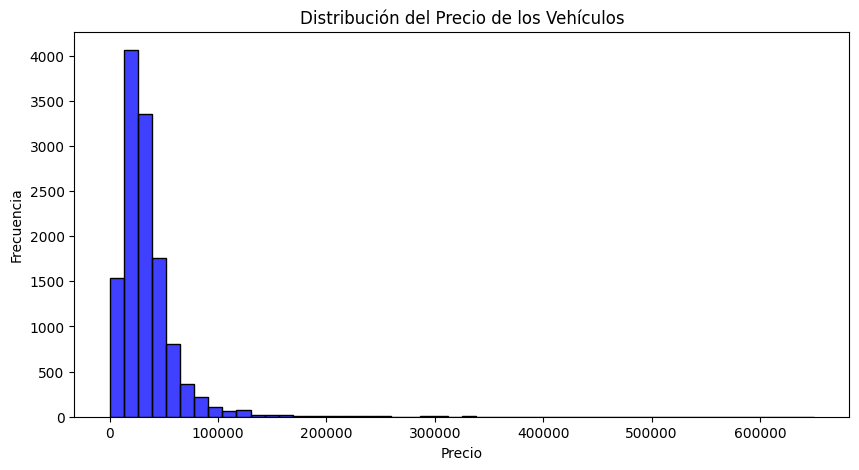

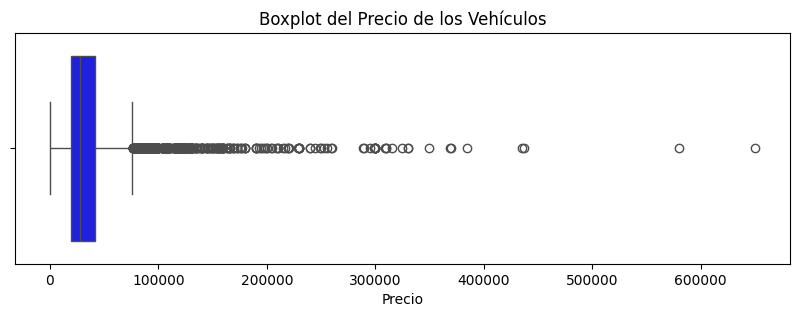

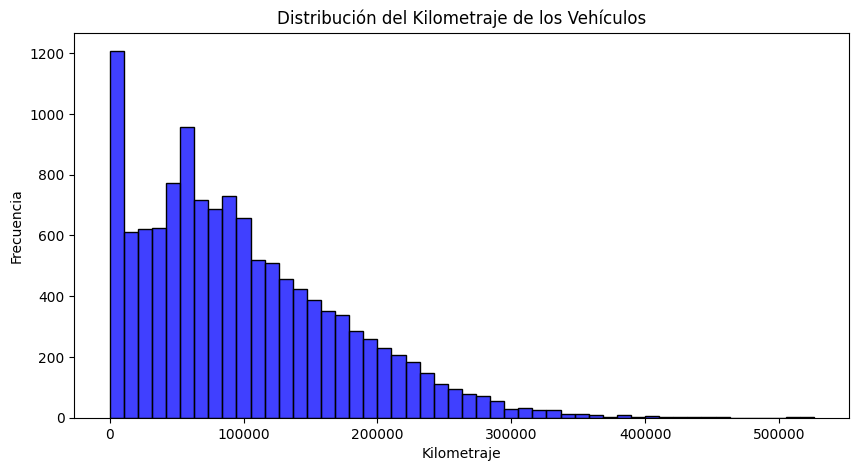

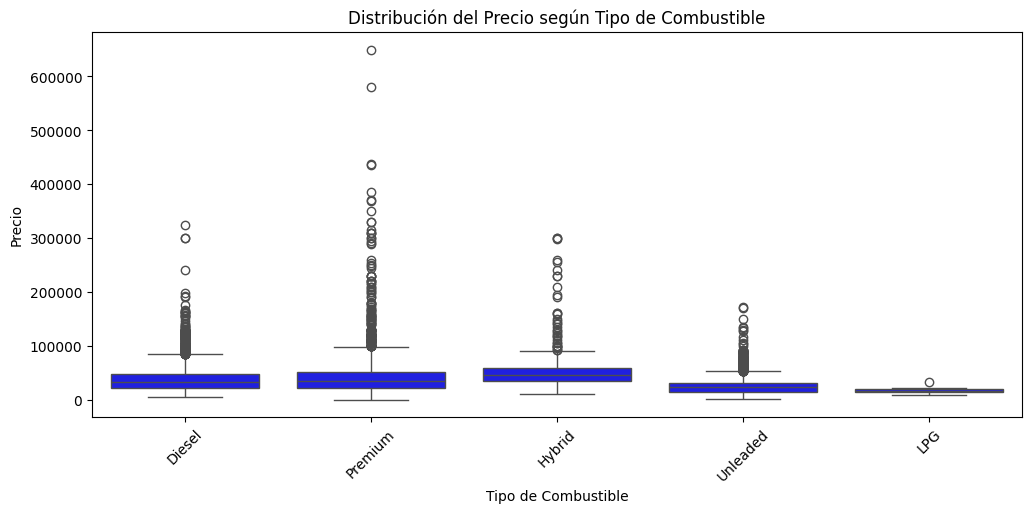

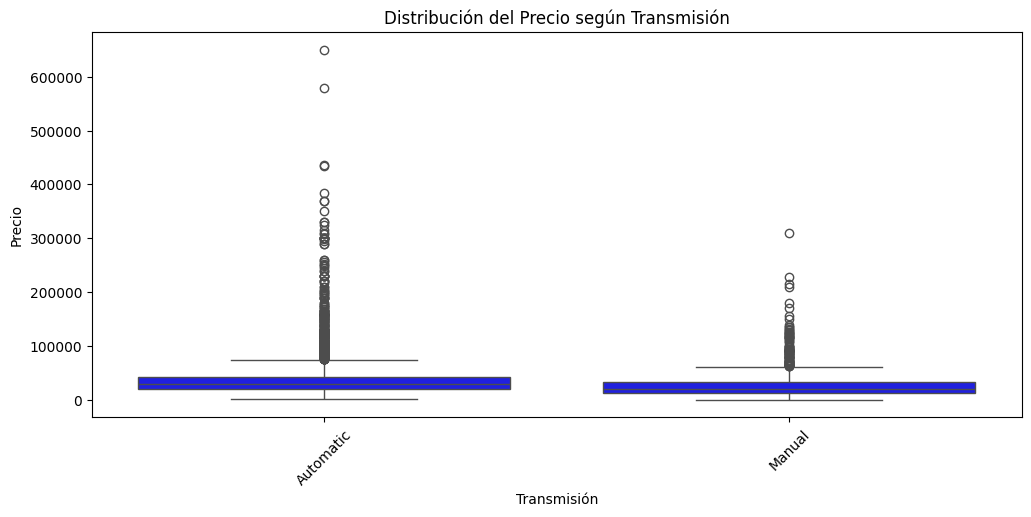

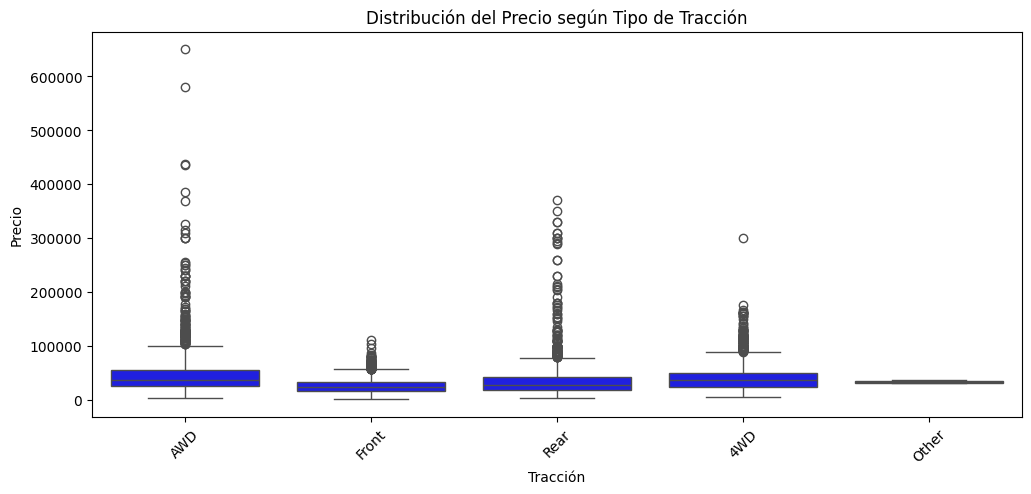

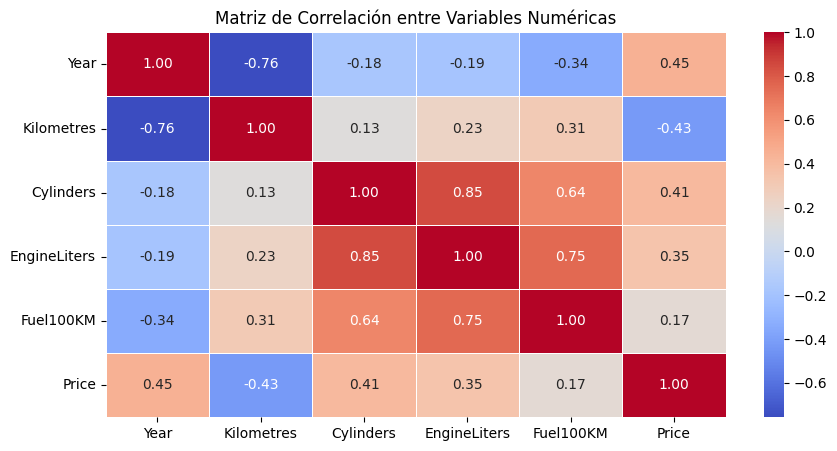

In [5]:
df = pd.read_csv('../data/processed/df_limpio_1.csv')
figures = [
    {"func": sns.histplot, "x": 'Price', "kwargs": {"bins": 50, "kde": False, "color": 'blue'}, "xlabel": "Precio", "ylabel": "Frecuencia", "title": "Distribución del Precio de los Vehículos", "figsize": (10, 5)},
    {"func": sns.boxplot, "x": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Precio", "ylabel": None, "title": "Boxplot del Precio de los Vehículos", "figsize": (10, 3)},
    {"func": sns.histplot, "x": 'Kilometres', "kwargs": {"bins": 50, "kde": False, "color": 'blue'}, "xlabel": "Kilometraje", "ylabel": "Frecuencia", "title": "Distribución del Kilometraje de los Vehículos", "figsize": (10, 5)},
    {"func": sns.boxplot, "x": 'FuelType', "y": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Tipo de Combustible", "ylabel": "Precio", "title": "Distribución del Precio según Tipo de Combustible", "figsize": (12, 5), "xticks_rotation": 45},
    {"func": sns.boxplot, "x": 'Transmission', "y": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Transmisión", "ylabel": "Precio", "title": "Distribución del Precio según Transmisión", "figsize": (12, 5), "xticks_rotation": 45},
    {"func": sns.boxplot, "x": 'DriveType', "y": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Tracción", "ylabel": "Precio", "title": "Distribución del Precio según Tipo de Tracción", "figsize": (12, 5), "xticks_rotation": 45}
]

for fig in figures:
    plt.figure(figsize=fig["figsize"])
    plot = fig["func"](x=df[fig["x"]], **fig["kwargs"]) if "y" not in fig else fig["func"](x=df[fig["x"]], y=df[fig["y"]], **fig["kwargs"])
    plt.xlabel(fig["xlabel"])
    if fig["ylabel"]:
        plt.ylabel(fig["ylabel"])
    plt.title(fig["title"])
    if "xticks_rotation" in fig:
        plt.xticks(rotation=fig["xticks_rotation"])
    plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df[['Year', 'Kilometres', 'Cylinders', 'EngineLiters', 'Fuel100KM', 'Price']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Distribución del Precio de los Vehículos
- La distribución está sesgada a la derecha.
- **Interpretación**: La mayoría de los vehículos tienen precios bajos o moderados, pero hay algunos valores extremadamente altos.

### Boxplot del Precio de los Vehículos
- Se identificaron **outliers significativos** en los precios.

### Distribución del Kilometraje de los Vehículos
- El kilometraje muestra una distribución sesgada.
- **Interpretación**: Algunos vehículos tienen valores de kilometraje extremadamente altos.

### Distribución del Precio según Tipo de Combustible
- **Observación**: Los vehículos con combustible "Premium" o "Híbridos" tienden a tener precios más altos en comparación con otros.

### Distribución del Precio según Transmisión
- **Observación**: Los vehículos con transmisión automática tienen precios más altos que los manuales.
- También existen valores atípicos en ambas categorías.

### Distribución del Precio según Tipo de Tracción
- Los vehículos AWD (tracción total) suelen ser **más costosos** que aquellos con tracción simple.

### Matriz de Correlación entre Variables Numéricas
- **Year**: Correlación positiva con `Price`, indicando que los autos más nuevos tienden a ser más caros.
- **Kilometres**: Correlación negativa con `Price`, mostrando que los autos con mayor kilometraje suelen tener un precio menor.
- **Cylinders** y **EngineLiters**: Correlación positiva con `Price`, lo que sugiere que autos con motores más grandes son más caros.
- **Fuel100KM**: Baja correlación con `Price`, indicando que el consumo de combustible no es un factor clave.


## Clustering con K-Means / PCA

  File "c:\Users\garci\Desktop\EDA_ML_VH\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\garci\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\garci\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\garci\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


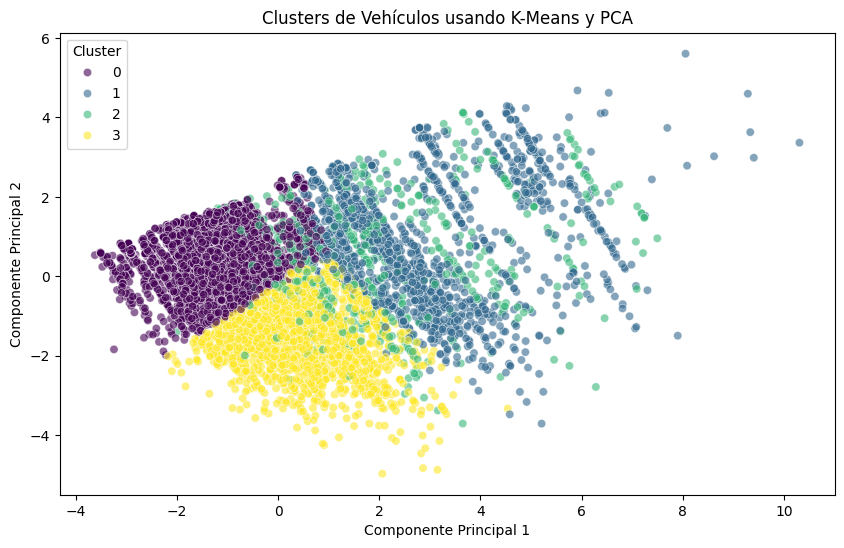

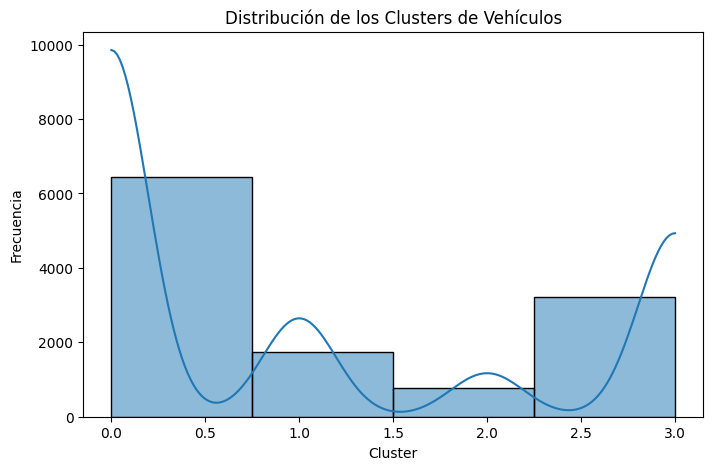

Resumen de cada Cluster:
                Year     Doors     Seats     Kilometres  Cylinders  \
Cluster                                                              
0        2019.093236  4.223084  5.183214   52109.677940   4.005119   
1        2014.656069  3.942775  5.693642  118463.353757   6.448555   
2        2014.922876  2.094118  2.954248  121592.062745   4.813072   
3        2012.357099  4.169870  5.184439  172519.899566   4.120893   

         EngineLiters  Fuel100KM         Price  
Cluster                                         
0            2.019268   6.915002  37485.353863  
1            3.776647  10.455202  50154.091329  
2            2.778431   8.820261  40342.542484  
3            2.256448   7.963980  18534.107254  


In [6]:
df = df.dropna().copy()

X_cluster = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Price", "LogPrice"], errors='ignore')

if X_cluster.shape[1] == 0:
    raise ValueError("No hay suficientes columnas numéricas para realizar clustering.")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="viridis", alpha=0.6)
plt.title("Clusters de Vehículos usando K-Means y PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["Cluster"], bins=4, kde=True)
plt.title("Distribución de los Clusters de Vehículos")
plt.xlabel("Cluster")
plt.ylabel("Frecuencia")
plt.show()

cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print("Resumen de cada Cluster:")
print(cluster_summary)


### Resumen de Clusters

| Cluster | Año promedio | Kilómetros recorridos | Cilindros | Litros del motor | Consumo de combustible (L/100km) | Precio promedio AUD |
|---------|--------------|-----------------------|-----------|------------------|----------------------------------|-----------------|
| 0       | 2019         | 51,169 km            | 4         | 2.00 L           | 6.92                            | 37,243 $        |
| 1       | 2014         | 128,243 km           | 6         | 3.31 L           | 9.53                            | 39,092 $        |
| 2       | 2015         | 105,073 km           | 8         | 5.06 L           | 12.28                           | 91,157 $        |
| 3       | 2012         | 171,794 km           | 4         | 2.20 L           | 7.96                            | 17,928 $        |

### Nota

El análisis de los clusters revela las siguientes tendencias:

- **Cluster 0**: Representa los vehículos más nuevos (2019) con menor kilometraje y un consumo eficiente de combustible (6.92 L/100km). Son opciones ideales para compradores que buscan eficiencia y menor desgaste.
- **Cluster 1**: Agrupa autos con una media de 6 cilindros y motores más grandes (3.31 L). Aunque son modelos más antiguos (2014), tienen un equilibrio entre potencia y precio.
- **Cluster 2**: Contiene los vehículos con motores más grandes (5.06 L) y mayor consumo de combustible (12.28 L/100km). Son autos de mayor desempeño y lujo, lo que justifica su alto precio promedio de 91,157 $.
- **Cluster 3**: Representa los autos más antiguos (2012) con el mayor kilometraje recorrido (171,794 km). Suelen tener precios más accesibles, ideales para compradores con menor presupuesto.

Este análisis facilita la segmentación de los vehículos en función de su antigüedad, consumo y precio, permitiendo identificar tendencias y ayudar en la toma de decisiones para distintos perfiles de compradores.

## Codificación de variables

In [7]:
categorical_one_hot = ["FuelType", "Transmission", "DriveType", "UsedOrNew"]
df = pd.get_dummies(df, columns=categorical_one_hot, drop_first=True)

one_hot_columns = df.filter(like='_').columns
df[one_hot_columns] = df[one_hot_columns].astype(int)

categorical_label = ["Brand", "Model", "BodyType", "Color", "City", "State"]
label_encoders = {}

for col in categorical_label:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

## Transformación Logarítmica 

In [8]:
df["LogPrice"] = np.log1p(df["Price"])

## Modelos de Predicción

In [9]:
X = df.drop(columns=["Price", "Title", "LogPrice"])
y = df["LogPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
models = {
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Regresión Lineal": LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model

In [11]:
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}
results_df = pd.DataFrame(results).T
print(results_df)

                       MSE  R2 Score
XGBoost           0.034329  0.913739
Random Forest     0.039619  0.900447
Regresión Lineal  0.077591  0.805031


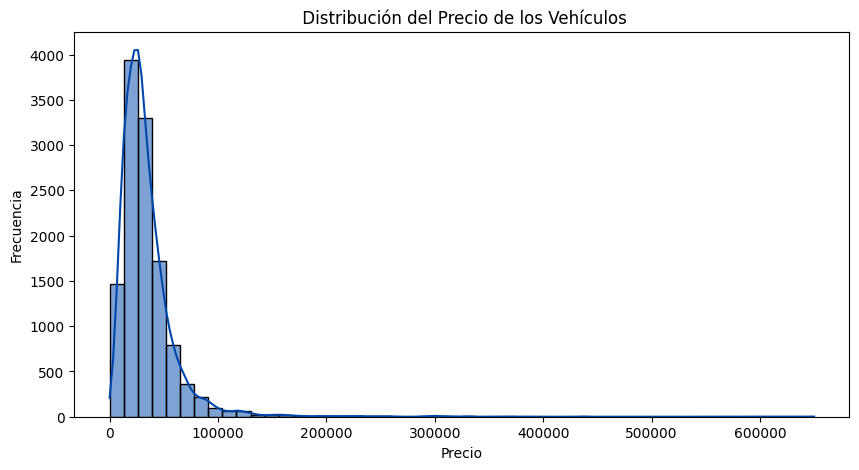

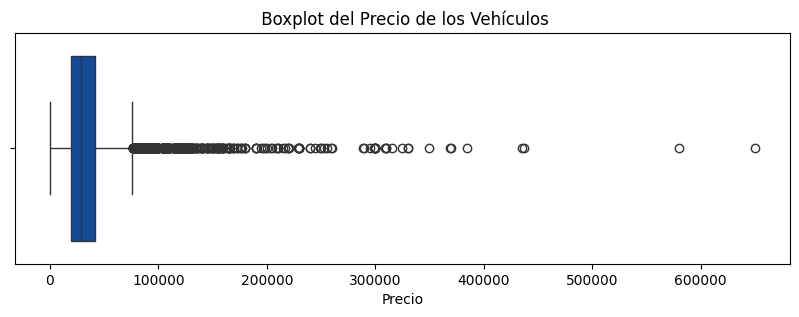

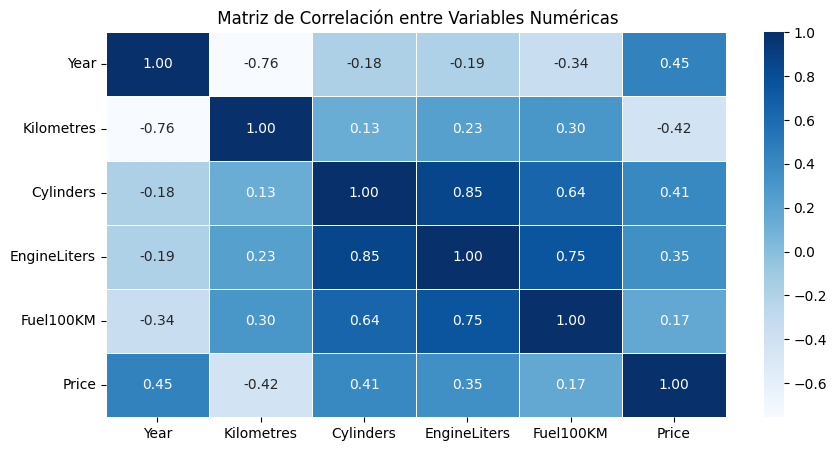

In [12]:
cobalt_blue = "#0047AB"

plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=50, kde=True, color=cobalt_blue)
plt.title(" Distribución del Precio de los Vehículos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(x=df["Price"], color=cobalt_blue)
plt.title(" Boxplot del Precio de los Vehículos")
plt.xlabel("Precio")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df[['Year', 'Kilometres', 'Cylinders', 'EngineLiters', 'Fuel100KM', 'Price']].corr(), 
            annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title(" Matriz de Correlación entre Variables Numéricas")
plt.show()


## Conclusión Final

### Análisis Comparativo de Modelos de Machine Learning

Tras realizar un Análisis Exploratorio de Datos (EDA) y evaluar diferentes modelos de Machine Learning, se compararon tres enfoques principales:

| Modelo            | MSE    | R² Score |
|--------------------|--------|----------|
| XGBoost           | 0.0343 | 0.9137   |
| Random Forest      | 0.0396 | 0.9004   |
| Regresión Lineal   | 0.0775 | 0.8050   |

El modelo **XGBoost** obtuvo el mejor desempeño en términos de precisión y generalización:

- **Menor error cuadrático medio** (MSE: 0.0343), lo que indica predicciones más precisas.
- **Mayor coeficiente de determinación** (R²: 0.9137), evidenciando que el modelo explica el 91.37% de la variabilidad en los precios de los vehículos.
- **Balance entre sesgo y varianza**, evitando el sobreajuste y permitiendo una mejor generalización a nuevos datos.
- **Mayor eficiencia computacional**, en comparación con otros modelos como Random Forest.


## Conclusión Final del Proyecto

El desarrollo e implementación de un modelo de Machine Learning para la predicción de precios óptimos de vehículos usados ha resultado en una serie de avances estratégicos y operativos significativos para el concesionario en Australia:

- **Precisión mejorada**: El modelo XGBoost demostró ser el más eficiente, con un bajo MSE (0.0343) y un alto R² (0.9137), permitiendo predicciones precisas y confiables.
- **Automatización del proceso**: La eliminación de subjetividades en la tasación de vehículos asegura consistencia y objetividad en la fijación de precios.
- **Competitividad incrementada**: Al generar precios alineados con el mercado, el concesionario se posiciona como un jugador competitivo e innovador.
- **Rentabilidad optimizada**: Reducción de pérdidas por subvaloración y sobrevaloración, maximizando el retorno de inversión en las ventas de vehículos.
- **Generalización efectiva**: El modelo presenta un balance sólido entre sesgo y varianza, asegurando un desempeño confiable incluso con nuevos datos.
- **Eficiencia computacional**: En comparación con otros modelos evaluados, XGBoost destaca por su capacidad para manejar grandes volúmenes de datos sin comprometer la velocidad de procesamiento.
- **Confianza reforzada**: Clientes y vendedores pueden confiar en precios justos y transparentes, fortaleciendo la relación comercial.
- **Agilidad operativa**: El proceso de venta se acelera gracias a decisiones fundamentadas en datos, mejorando la experiencia tanto del cliente como del equipo interno.

Este proyecto marca un hito en la transformación digital del concesionario, dotándolo de herramientas avanzadas para la toma de decisiones basada en datos. Con este enfoque, el concesionario se posiciona como líder en el mercado de autos usados, asegurando sostenibilidad, rentabilidad y diferenciación frente a sus competidores.

